# Simple Linear Regression

## Objective

Predicting the CO2 emission based on the engine size of the car

### Importing the packages

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### Understanding the data
We have downloaded a fuel consumption dataset, Fuel_Consumption.csv, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada.

In [54]:
df = pd.read_csv("Fuel_Consumption.csv")
for col in df.columns:
    print(col)

MODEL YEAR
MAKE
MODEL
VEHICLE CLASS
ENGINE SIZE
CYLINDERS
TRANSMISSION
FUEL CONSUMPTION COMB
CO2 EMISSIONS


### Importing the data

In [68]:
df = pd.read_csv("Fuel_Consumption.csv", encoding='cp1252')

# take a look at the dataset
df.head()

,MODEL YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL CONSUMPTION COMB,CO2 EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,8.5,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,9.6,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,5.9,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,11.1,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,10.6,244


In [56]:
df = df.dropna()

### Data Exploration

In [57]:
df.describe()

,MODEL YEAR,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION COMB,CO2 EMISSIONS
count,1071.0,1071.000000,1071.000000,1071.000000,1071.000000
mean,2014.0,3.342577,5.788049,11.572082,256.116713
std,0.0,1.415778,1.797425,3.484679,63.530627
min,2014.0,1.000000,3.000000,4.700000,108.000000
25%,2014.0,2.000000,4.000000,9.000000,207.000000
50%,2014.0,3.400000,6.000000,10.900000,251.000000
75%,2014.0,4.300000,8.000000,13.350000,294.000000
max,2014.0,8.400000,12.000000,25.800000,488.000000


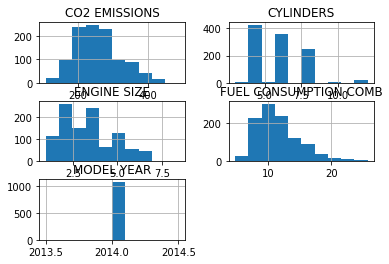

In [58]:
df.hist()
plt.show()

Now, let's plot each of these features against the Emission, to see how linear their relationship is:

### Fuel Consumption Combined vs. CO2 Emissions

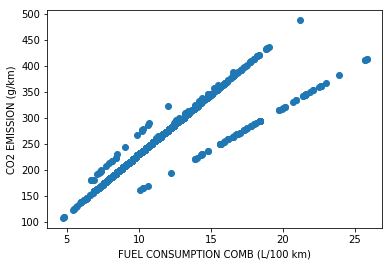

In [59]:
plt.scatter(df["FUEL CONSUMPTION COMB"], df["CO2 EMISSIONS"])
plt.xlabel("FUEL CONSUMPTION COMB (L/100 km)")
plt.ylabel("CO2 EMISSION (g/km)")
plt.show()

### Engine Size vs. CO2 Emissions

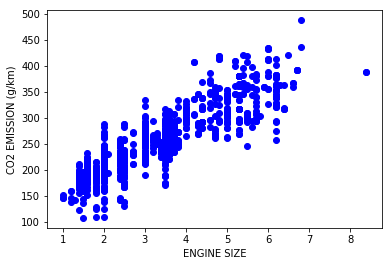

In [60]:
plt.scatter(df["ENGINE SIZE"], df["CO2 EMISSIONS"],  color='blue')
plt.xlabel("ENGINE SIZE")
plt.ylabel("CO2 EMISSION (g/km)")
plt.show()

### Cylinders vs. CO2 Emissions

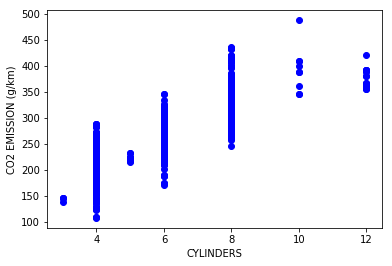

In [61]:
plt.scatter(df["CYLINDERS"], df["CO2 EMISSIONS"],  color='blue')
plt.xlabel("CYLINDERS")
plt.ylabel("CO2 EMISSION (g/km)")
plt.show()

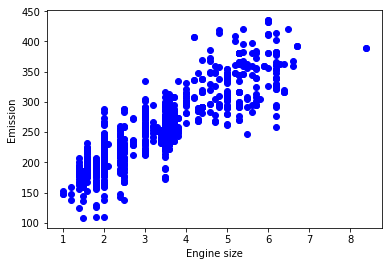

In [63]:
plt.scatter(train["ENGINE SIZE"], train["CO2 EMISSIONS"],  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

## Creating Train and Test Dataset

In [62]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

## Modeling
Using sklearn package to model data

In [64]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINE SIZE']])
train_y = np.asanyarray(train[['CO2 EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[38.41519376]]
Intercept:  [127.69774263]


## Plot Outputs
We can plot the fit line over the data

Text(0,0.5,'Emission')

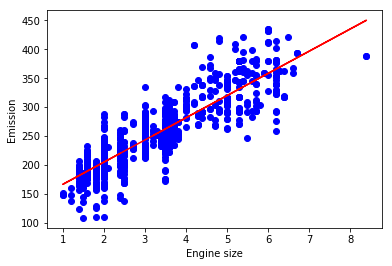

In [66]:
plt.scatter(train["ENGINE SIZE"], train["CO2 EMISSIONS"],  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

## Model Evaluation

In [67]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINE SIZE']])
test_y = np.asanyarray(test[['CO2 EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 25.02
Residual sum of squares (MSE): 1068.42
R2-score: 0.76
